In [1]:
import numpy as np
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory


In [28]:
from IPython.display import display, Latex, display, Image

# LaTeX code
latex_code = r"""
\begin{array}{ll}
\text{Maximize} & z=-y_1+2y_2+y_3+2x_1 \\
\text{subject to} & y_1+y_2-y_3+3x_1 \leq 7 \\
& y_2+3y_3-x_1 \leq 5 \\
& 3y_1+x_1 \geq 2 \\
& y_1, y_2, y_3 \geq 0 \text{ and integer} \\
& x_1 \geq 0
\end{array}
"""

# Display LaTeX
display(Latex(latex_code))


<IPython.core.display.Latex object>

### In this exercise, I will perform Breadth-First Search (BFS) on the Branch and Bound algorithm step by step.

In [20]:
def create_model():
    model = pyo.ConcreteModel()

    model.y1 = pyo.Var(bounds=(0,1000))
    model.y2 = pyo.Var(bounds=(0,1000))
    model.y3 = pyo.Var(bounds=(0,1000))
    model.x1 = pyo.Var(bounds=(0,1000))

    y1 = model.y1
    y2 = model.y2
    y3 = model.y3
    x1 = model.x1
    
    
    model.C1 = pyo.Constraint(expr= y1+y2-y3+3*x1<=7)
    model.C2 = pyo.Constraint(expr= y2+3*y3-x1<=5)
    model.C3 = pyo.Constraint(expr= 3*y1+x1>=2)
    
    return model, y1, y2, y3, x1

In [21]:
def output(model, result):
    print('\n---------------------------------------------------------------------')
    if result['Solver'][0]['Termination condition'].__str__() != 'infeasible':
        y1_value = pyo.value(y1)
        y2_value = pyo.value(y2)
        y3_value = pyo.value(y3)
        x1_value = pyo.value(x1)
        print('x1=',x1_value)
        print('y1=',y1_value)
        print('y2=',y2_value)
        print('y3=',y3_value)
        print('\n--------------')
        print('z=',obj(x1_value, y1_value, y2_value, y3_value))
    print('feasibility=',result['Solver'][0]['Termination condition'].__str__())

In [22]:
def obj(x1, y1, y2, y3):
    return -y1 + 2*y2 + y3 + 2*x1

In [24]:
model, y1, y2, y3, x1 = create_model()

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 0.3636363636363636
y1= 0.5454545454545454
y2= 5.363636363636363
y3= 0.0

--------------
z= 10.909090909090908
feasibility= optimal


In [25]:
model, y1, y2, y3, x1 = create_model()

# Branch 2, y2 <=5
model.C4 = pyo.Constraint(expr= y2 <=5)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 0.5714285714285715
y1= 0.47619047619047616
y2= 5.0
y3= 0.1904761904761905

--------------
z= 10.857142857142856
feasibility= optimal


In [8]:
model, y1, y2, y3, x1 = create_model()

# Branch 3, y2 >= 6
model.C4 = pyo.Constraint(expr= y2 >= 6)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
feasibility= infeasible


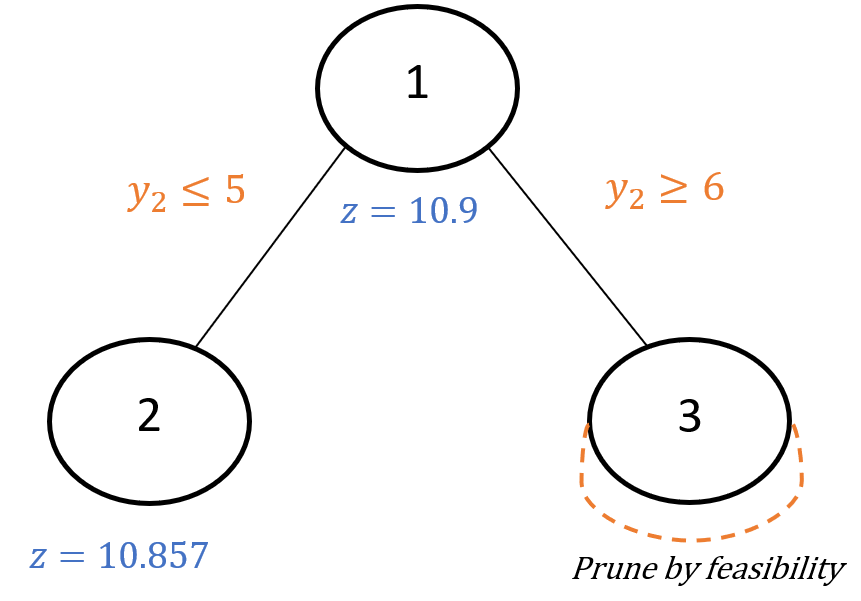

In [29]:
display(Image(filename='Tree/1.png'))

In [11]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)

# Branch 4, y1 <= 0
model.C5 = pyo.Constraint(expr= y1 <= 0)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 2.0
y1= 0.0
y2= 2.5
y3= 1.4999999999999998

--------------
z= 10.5
feasibility= optimal


In [13]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)

# Branch 5, y1 >= 1
model.C5 = pyo.Constraint(expr= y1 >= 1)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 0.375
y1= 1.0
y2= 5.0
y3= 0.125

--------------
z= 9.875
feasibility= optimal


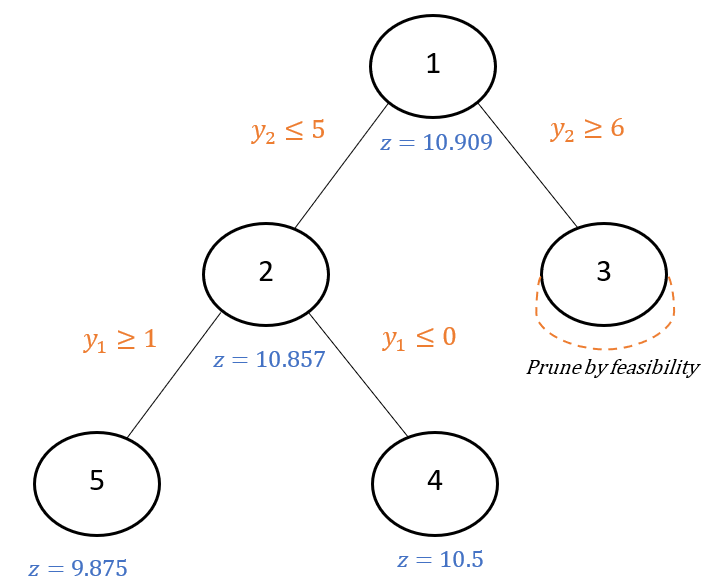

In [42]:
display(Image(filename='Tree/2.png'))

In [31]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 >= 1)

# Branch 6, y3 >= 1
model.C6 = pyo.Constraint(expr= y3 >= 1)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 1.2499999999999998
y1= 1.0
y2= 3.25
y3= 1.0

--------------
z= 9.0
feasibility= optimal


In [16]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 >= 1)

# Branch 7, y3 <= 0
model.C6 = pyo.Constraint(expr= y3 <= 0)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 0.3333333333333332
y1= 1.0
y2= 5.0
y3= 0.0

--------------
z= 9.666666666666666
feasibility= optimal


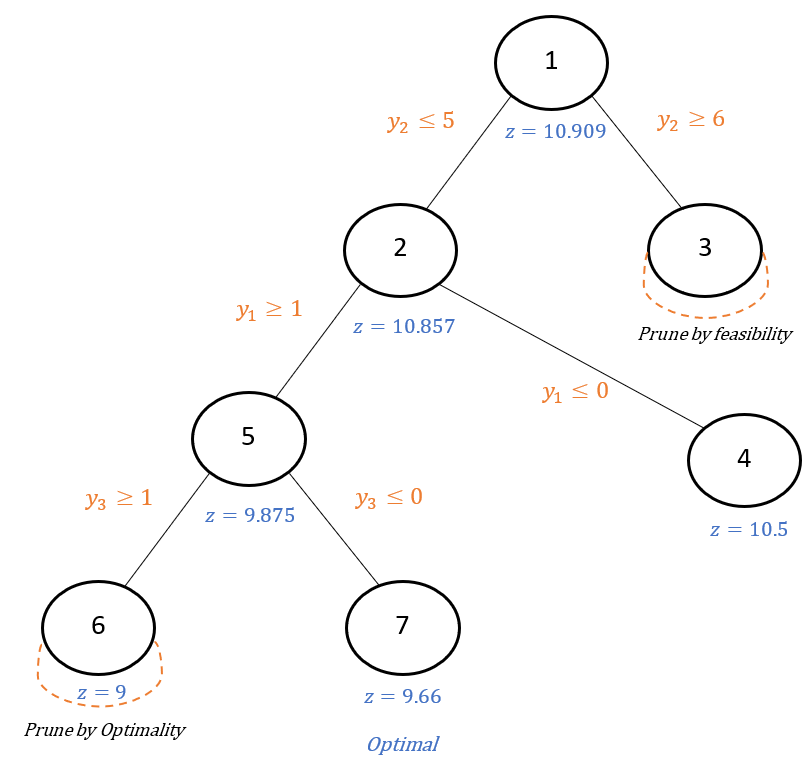

In [32]:
display(Image(filename='Tree/3.png'))

In [33]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)

# Branch 8, y3 <= 1
model.C6 = pyo.Constraint(expr= y3 <= 1)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 2.0
y1= 0.0
y2= 2.0
y3= 1.0

--------------
z= 9.0
feasibility= optimal


In [34]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)

# Branch 9, y3 >= 2
model.C6 = pyo.Constraint(expr= y3 >= 2)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 2.5
y1= 0.0
y2= 1.5
y3= 2.0

--------------
z= 10.0
feasibility= optimal


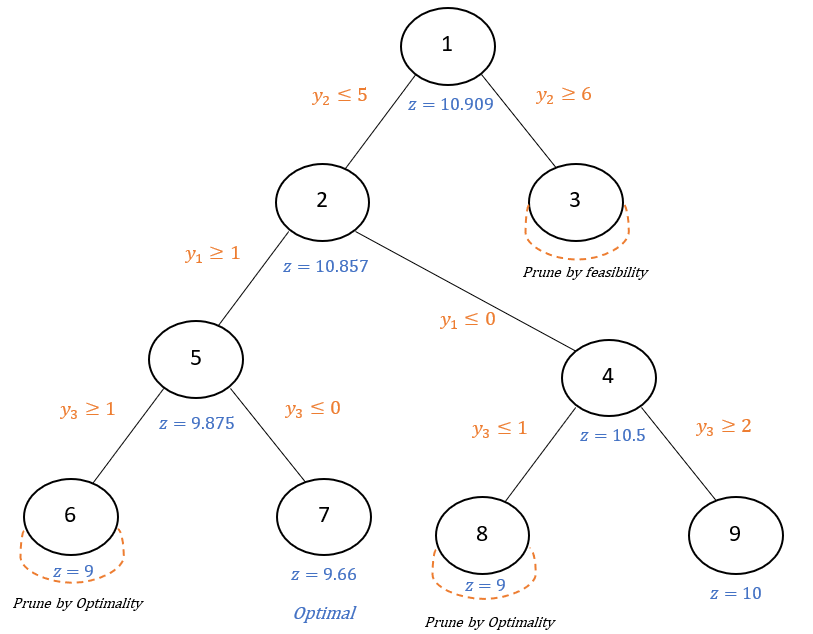

In [39]:
display(Image(filename='Tree/4.png'))

In [40]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)
model.C6 = pyo.Constraint(expr= y3 >= 2)

# Branch 10, y2 <= 1
model.C7 = pyo.Constraint(expr= y2 <= 1)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 2.75
y1= 0.0
y2= 1.0
y3= 2.25

--------------
z= 9.75
feasibility= optimal


In [36]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)
model.C6 = pyo.Constraint(expr= y3 >= 2)

# Branch 11, y2 >= 2
model.C7 = pyo.Constraint(expr= y2 >= 2)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
feasibility= infeasible


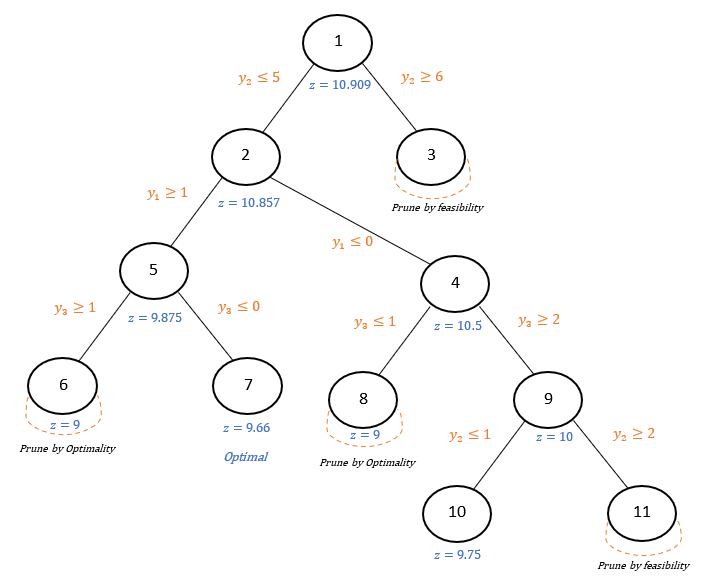

In [41]:
display(Image(filename='Tree/5.png'))

In [43]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)
model.C6 = pyo.Constraint(expr= y3 >= 2)
model.C7 = pyo.Constraint(expr= y2 >= 2)


# Branch 12, y3 >= 3
model.C8 = pyo.Constraint(expr= y3 >= 3)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
feasibility= infeasible


In [44]:
model, y1, y2, y3, x1 = create_model()

model.C4 = pyo.Constraint(expr= y2 <=5)
model.C5 = pyo.Constraint(expr= y1 <= 0)
model.C6 = pyo.Constraint(expr= y3 >= 2)
model.C7 = pyo.Constraint(expr= y2 >= 2)


# Branch 13, y3 <= 2
model.C8 = pyo.Constraint(expr= y3 <= 2)

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
feasibility= infeasible


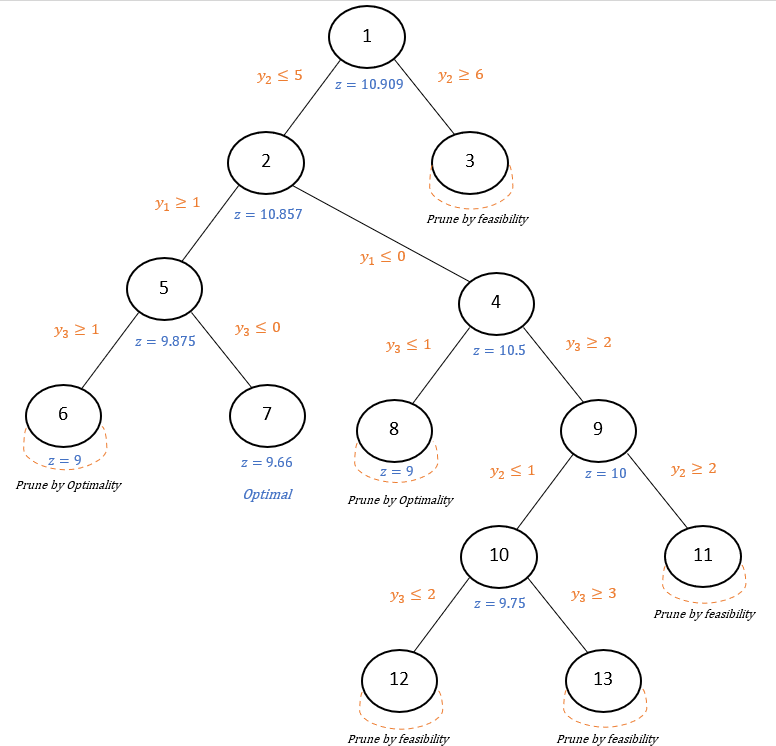

In [45]:
display(Image(filename='Tree/6.png'))

### The optimal values for this mixed-integer problem would be x1 = 0.33, y1 = 1.0, y2 = 5.0, y3 = 0.0, and z = 9.66.

### Let's verify this by solving the problem using MILP."

In [19]:
def create_model():
    model = pyo.ConcreteModel()

    model.y1 = pyo.Var(bounds=(0,100), within=pyo.Integers)
    model.y2 = pyo.Var(bounds=(0,100), within=pyo.Integers)
    model.y3 = pyo.Var(bounds=(0,100), within=pyo.Integers)
    model.x1 = pyo.Var(bounds=(0,100))

    y1 = model.y1
    y2 = model.y2
    y3 = model.y3
    x1 = model.x1
    
    
    model.C1 = pyo.Constraint(expr= y1+y2-y3+3*x1<=7)
    model.C2 = pyo.Constraint(expr= y2+3*y3-x1<=5)
    model.C3 = pyo.Constraint(expr= 3*y1+x1>=2)
    
    return model, y1, y2, y3, x1

def output(model, result):
    print('\n---------------------------------------------------------------------')
    if result['Solver'][0]['Termination condition'].__str__() != 'infeasible':
        y1_value = pyo.value(y1)
        y2_value = pyo.value(y2)
        y3_value = pyo.value(y3)
        x1_value = pyo.value(x1)
        print('x1=',x1_value)
        print('y1=',y1_value)
        print('y2=',y2_value)
        print('y3=',y3_value)
        print('\n--------------')
        print('z=',obj(x1_value, y1_value, y2_value, y3_value))
    print('feasibility=',result['Solver'][0]['Termination condition'].__str__())

model, y1, y2, y3, x1 = create_model()

model.obj = pyo.Objective(expr= -y1 + 2*y2 + y3 + 2*x1, sense=maximize)

opt = SolverFactory('cplex')
result = opt.solve(model)

output(model, result)


---------------------------------------------------------------------
x1= 0.33333333433333334
y1= 0.999999997
y2= 5.0
y3= 0.0

--------------
z= 9.666666671666666
feasibility= optimal
